# Voting Classifier

## Importing required librarries

In [66]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading

In [67]:
df = pd.read_csv("clean_income_data.csv")

In [68]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Feature Engineering

## Creating numerical categories for feature 'class'

In [69]:
df['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [70]:
df['class'].replace('<=50K',0,inplace=True)
df['class'].replace('>50K',1,inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [71]:
df['class'].unique()

array([0, 1])

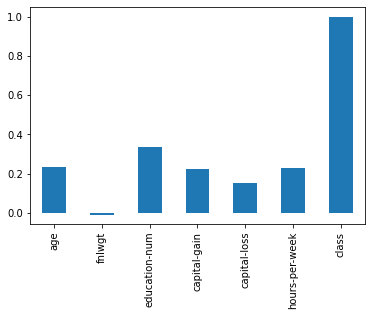

In [72]:
df.corr()['class'].plot.bar()

## Balancing Dataset

In [73]:
df['class'].value_counts()

0    24698
1     7839
Name: class, dtype: int64

In [74]:
from sklearn.utils import resample
df_majority = df[df['class']==0]
df_minority = df[df['class']==1]
df_majority_down = resample(df_majority, replace=True,n_samples= df_minority.shape[0],random_state=42) 

In [75]:
final_df = pd.concat([df_majority_down,df_minority])

## Encoding categorical variables

In [76]:
df = pd.get_dummies(final_df,drop_first=True)

In [77]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
31123,28,194200,9,0,0,70,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
20745,43,187778,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1127,63,124244,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7103,46,182128,14,6497,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
28383,33,403468,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.shape

(15678, 97)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15678 entries, 31123 to 32536
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        15678 non-null  int64
 1   fnlwgt                                     15678 non-null  int64
 2   education-num                              15678 non-null  int64
 3   capital-gain                               15678 non-null  int64
 4   capital-loss                               15678 non-null  int64
 5   hours-per-week                             15678 non-null  int64
 6   class                                      15678 non-null  int64
 7   workclass_Local-gov                        15678 non-null  uint8
 8   workclass_Never-worked                     15678 non-null  uint8
 9   workclass_Private                          15678 non-null  uint8
 10  workclass_Self-emp-inc                    

All the categorical features encoded in integer

## Dataset splitting into dependent y and independent features X

In [80]:
X = df.drop(['class'],axis=1)
X.shape

(15678, 96)

In [81]:
y = df['class']
y.shape

(15678,)

## Splitting data into training and testing data

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [83]:
x_train.shape

(10974, 96)

In [84]:
y_train.shape

(10974,)

## Performing standardization of data for converting them into same scale

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Training

### Single Logistic regression model

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8263180272108843

### Single Support Vector classifier

In [104]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8129251700680272

## Voting Classifier Model

In [109]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
estimators = [('rf',RandomForestClassifier()),('svcm',SVC()),('lr',LogisticRegression())]
model = VotingClassifier(estimators=estimators,voting='hard')
model.fit(x_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svcm', SVC()),
                             ('lr', LogisticRegression())])

In [110]:
from sklearn.metrics import accuracy_score
y_pred3 = model.predict(x_test)
accuracy_score(y_test,y_pred3)

0.83078231292517

### Accuracy increased by 1-2% using Voting classifier technique